In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Desired Column Labels
property_labels = sorted(['LPS Abs', 'LPS Lum', 'MPLA Abs', 'MPLA Lum', 'CpG Abs', 'cGAMP Abs', 'cGAMP Lum'])
property_std_labels = sorted([prop + ' Std' for prop in property_labels])
#columns = sorted(property_labels + property_std_labels)

## Filter

In [3]:
raw = pd.read_csv('./raw.csv')

In [4]:
# Shuffle
data = raw.sample(frac=1).reset_index(drop=True)

In [5]:
# Get Desired Columns
smiles = data['SMILES']
y = data[property_labels]
std = data[property_std_labels]

In [6]:
# Rename Columns
property_labels = ['property_' + label.replace(' ', '_') for label in property_labels]
property_std_labels = ['property_' + label.replace(' ', '_') for label in property_std_labels]
y.columns = property_labels
std.columns = property_labels

In [7]:
data.to_csv('all.csv', index=False)

## Log and Normalize

In [8]:
log_std = std/y
log_y = np.log(y)

In [9]:
mu, sig = log_y.mean(), log_y.std()

norm_log_y = (log_y - mu)/sig
norm_log_std = log_std/sig

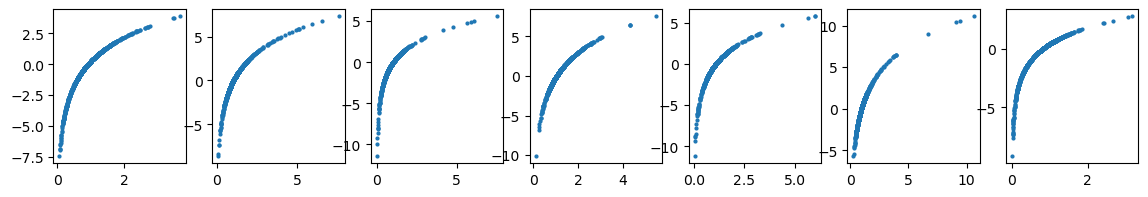

In [10]:
fig, axs = plt.subplots(1, 7, figsize=(14, 2))

for i, ax in enumerate(axs):
    ax.scatter(y.iloc[:, i], norm_log_y.iloc[:, i], s=4)

## Split and Save

In [11]:
n_train, n_test = data.shape[0] * 8 // 10, len(data) // 10

In [12]:
train_smiles, validation_smiles, test_smiles= smiles.iloc[:n_train], smiles.iloc[n_train:n_train+n_test], smiles.iloc[n_train+n_test:]
train_y, validation_y, test_y = norm_log_y.iloc[:n_train], norm_log_y.iloc[n_train:n_train+n_test], norm_log_y.iloc[n_train+n_test:]
train_std, validation_std, test_std = norm_log_std.iloc[:n_train], norm_log_std.iloc[n_train:n_train+n_test], norm_log_std.iloc[n_train+n_test:]

In [13]:
directory_path = './log_normalized'

pd.concat((train_smiles, train_y), axis=1).to_csv(f'{directory_path}/train.csv', index=None)
pd.concat((validation_smiles, validation_y), axis=1).to_csv(f'{directory_path}/validation.csv', index=None)
pd.concat((test_smiles, test_y), axis=1).to_csv(f'{directory_path}/test.csv', index=None)

train_smiles.to_csv(f'{directory_path}/train/smiles.csv', index=None)
test_smiles.to_csv(f'{directory_path}/test/smiles.csv', index=None)
validation_smiles.to_csv(f'{directory_path}/validation/smiles.csv', index=None)

train_y.to_csv(f'{directory_path}/train/y.csv', index=None)
test_y.to_csv(f'{directory_path}/test/y.csv', index=None)
validation_y.to_csv(f'{directory_path}/validation/y.csv', index=None)

train_std.to_csv(f'{directory_path}/train/std.csv', index=None)
test_std.to_csv(f'{directory_path}/test/std.csv', index=None)
validation_std.to_csv(f'{directory_path}/validation/std.csv', index=None)

In [14]:
print(test_y.mean(), test_y.std())

property_CpG_Abs      0.036079
property_LPS_Abs      0.029708
property_LPS_Lum      0.023229
property_MPLA_Abs    -0.031545
property_MPLA_Lum     0.004526
property_cGAMP_Abs    0.087316
property_cGAMP_Lum   -0.005332
dtype: float64 property_CpG_Abs      0.862897
property_LPS_Abs      1.072888
property_LPS_Lum      0.971183
property_MPLA_Abs     0.995109
property_MPLA_Lum     1.015077
property_cGAMP_Abs    1.219381
property_cGAMP_Lum    1.027267
dtype: float64
